# Imports

In [16]:
%load_ext autoreload
%autoreload 2
from display_image import ImageDisplay

import os
import sys
import pandas as pd
import seaborn as sns
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import random
%matplotlib inline
import numpy as np


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load Dataset

In [17]:
# Loading training dataset
df_train = pd.read_csv(f'data{os.sep}mnist_train.csv')
print(df_train.shape)

(60000, 785)


In [18]:
# Loading test dataset
df_test = pd.read_csv(f'data{os.sep}mnist_test.csv')
print(df_train.shape)

(60000, 785)


In [19]:
train_labels = df_train.iloc[:, 0].values
train_images = df_train.iloc[:, 1:].values
train_images = train_images.reshape((train_images.shape[0], 784))

test_labels = df_test.iloc[:, 0].values
test_images = df_test.iloc[:, 1:].values
test_images = test_images.reshape((test_images.shape[0], 784))

df_train_images = pd.DataFrame({
    "label": train_labels,
    "image": np.array(train_images).tolist()
    })


df_test_images = pd.DataFrame({
    "label": test_labels,
    "image": np.array(test_images).tolist()
    })

print(df_train_images.shape)
print(df_test_images.shape)

(60000, 2)
(10000, 2)


# Data visualization

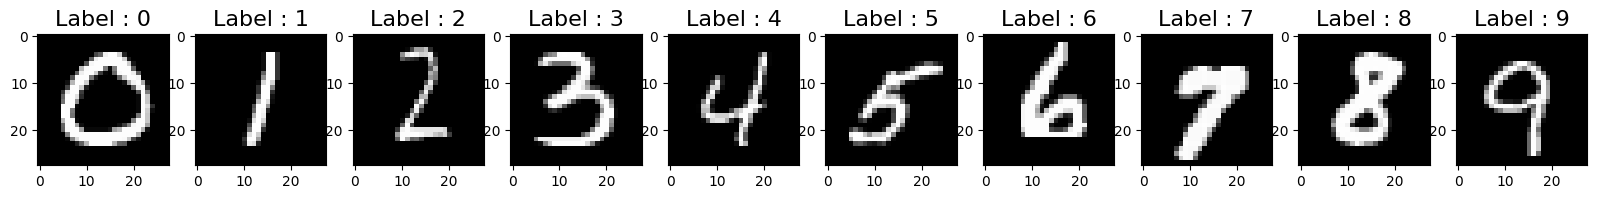

In [20]:
#Visualize examples
fig, ax = plt.subplots(1, 10, figsize=(20,20))

for i in range(10) :
    sample = df_train_images.loc[df_train_images["label"] == i]
    disp = ImageDisplay(sample)
    disp.display_image(ax[i], random.randint(0, len(sample) - 1))
    ax[i].set_title(f'Label : {i}', fontsize=16)

In [21]:
# Create format for table view in markdown
count_format = "# Repartition of each digits in dataset\n| Digits | Train | Test |\n"
count_format += "| :----- | :-------: | --------: |\n"

# Count the recurrence of each digit in the dataset
train_count_digits = [len(df_train[df_train.label == i]) for i in range(10)]
test_count_digits =  [len(df_test[df_test.label == i]) for i in range(10)]
for (index, train, test) in zip(range(10), train_count_digits, test_count_digits) :
    count_format += f'| {index} | {train} | {test} |\n'
display(Markdown(count_format))

# Repartition of each digits in dataset
| Digits | Train | Test |
| :----- | :-------: | --------: |
| 0 | 5923 | 980 |
| 1 | 6742 | 1135 |
| 2 | 5958 | 1032 |
| 3 | 6131 | 1010 |
| 4 | 5842 | 982 |
| 5 | 5421 | 892 |
| 6 | 5918 | 958 |
| 7 | 6265 | 1028 |
| 8 | 5851 | 974 |
| 9 | 5949 | 1009 |


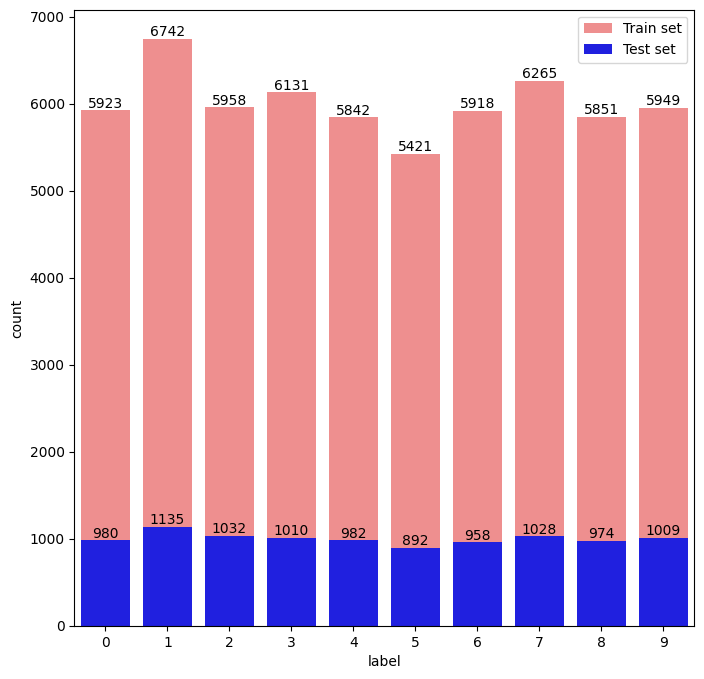

In [22]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(df_train, color='r', label='Train set', x="label", alpha=0.5)
sns.countplot(df_test, color='b', label='Test set', x="label")
ax.set_xticks(range(10), labels=map(str, range(10)))

plt.legend()
for i in ax.containers:
    ax.bar_label(i,)

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Function to compute metrics
def compute_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')  # Change average parameter as needed
    recall = recall_score(y_true, y_pred, average='weighted')  # Change average parameter as needed
    f1 = f1_score(y_true, y_pred, average='weighted')  # Change average parameter as needed

    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Confusion Matrix:")
    print(confusion)
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

In [24]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
model_lr = LogisticRegression(random_state=42, max_iter=10000)
model_lr.fit(train_images, train_labels)
y_pred_lr = model_lr.predict(test_images)

print("Performance Metrics for Logistic Regression:")
compute_metrics(test_labels, y_pred_lr)

Performance Metrics for Logistic Regression:
Accuracy: 92.07%
Confusion Matrix:
[[ 952    0    6    2    1    7    5    4    3    0]
 [   0 1110    8    3    0    1    3    2    8    0]
 [  12   16  911   19   10    5   11    7   36    5]
 [   4    1   22  919    2   21    1   12   21    7]
 [   3    3    9    5  908    0    8    6    8   32]
 [  10    3    3   36   10  770   15    7   33    5]
 [  10    5   11    2    7   16  906    0    1    0]
 [   1   10   24    7    7    2    0  943    5   29]
 [   8   15    4   22    6   25    9   10  863   12]
 [   6    7    2    9   19    8    1   22   10  925]]
Precision: 0.92
Recall: 0.92
F1 Score: 0.92


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
from sklearn.tree import DecisionTreeClassifier

# Decision Trees
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(train_images, train_labels)
y_pred_dt = model_dt.predict(test_images)

print("\nPerformance Metrics for Decision Tree:")
compute_metrics(test_labels, y_pred_dt)


Performance Metrics for Decision Tree:
Accuracy: 87.55%
Confusion Matrix:
[[ 914    1    7    4    6    9   16    5    8   10]
 [   0 1084    9    8    2    9    5    3   14    1]
 [  13   11  887   29   15    6    9   24   30    8]
 [   7    8   34  861    8   40    3    6   17   26]
 [   8    4   11    6  859    5   17   10   20   42]
 [  15    8    5   39    6  740   25    6   32   16]
 [  21    5   11    9   23   15  846    3   20    5]
 [   2    7   21   24   12    5    3  925    9   20]
 [   8    9   33   34   21   32   14   12  785   26]
 [  14    5   10   22   45   10    6   20   23  854]]
Precision: 0.88
Recall: 0.88
F1 Score: 0.88


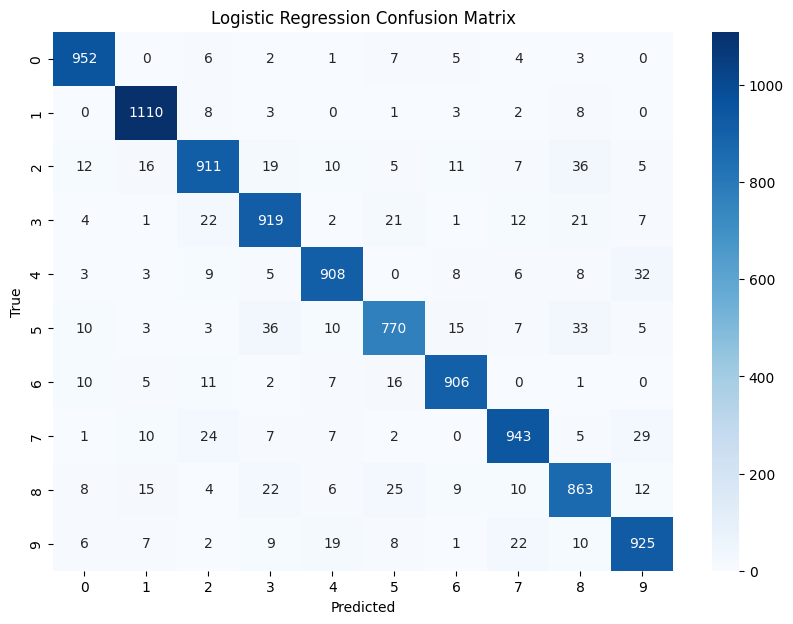

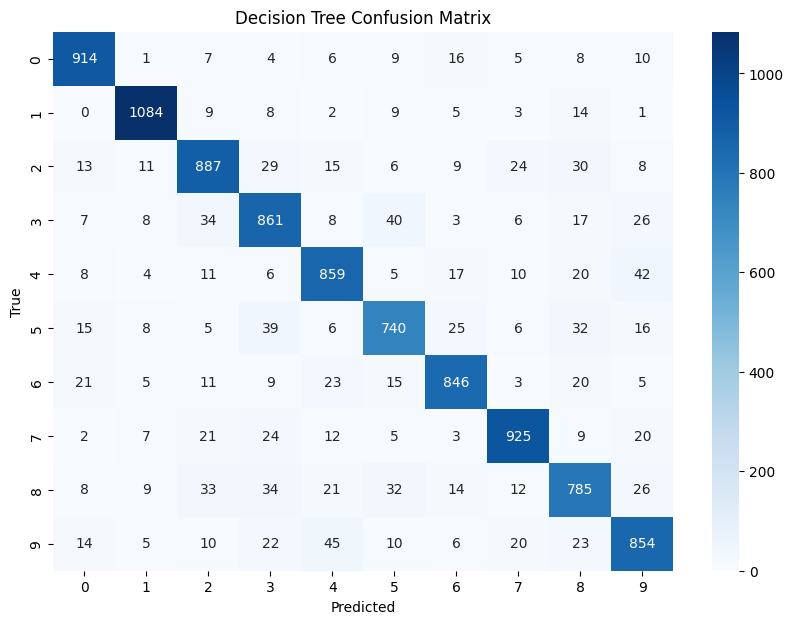

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title, file):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig(file)  # save plot to file
    plt.show()

# Plotting confusion matrices
plot_confusion_matrix(test_labels, y_pred_lr, title="Logistic Regression Confusion Matrix", file="lr_confusion_heatmap")
plot_confusion_matrix(test_labels, y_pred_dt, title="Decision Tree Confusion Matrix", file="dt_confusion_heatmap")


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

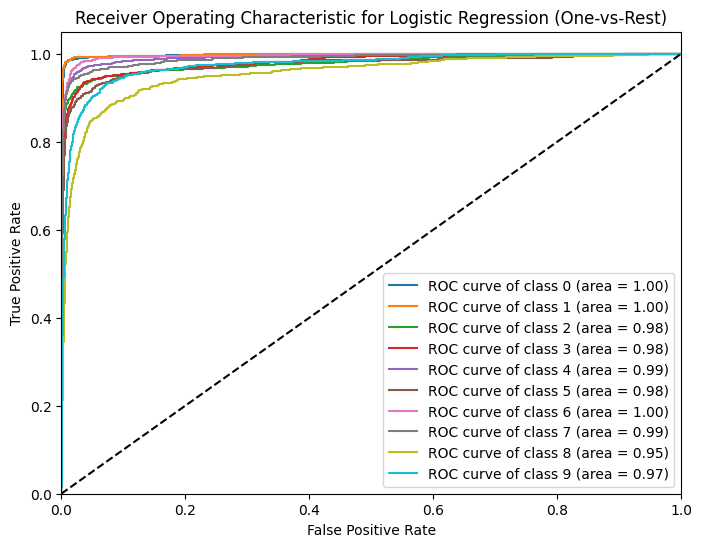

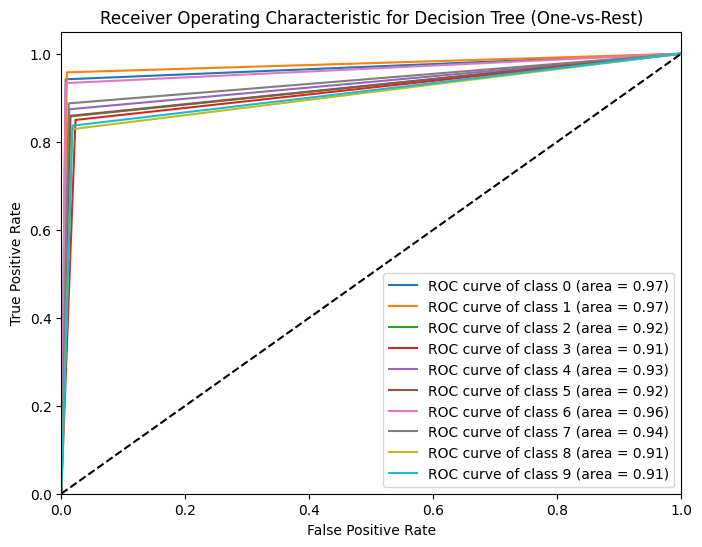

In [27]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output labels
train_labels_bin = label_binarize(train_labels, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
test_labels_bin = label_binarize(test_labels, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Fit models
model_lr_ovr = OneVsRestClassifier(LogisticRegression(random_state=42, max_iter=1000))
y_score_lr = model_lr_ovr.fit(train_images, train_labels_bin).decision_function(test_images)

model_dt_ovr = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
y_score_dt = model_dt_ovr.fit(train_images, train_labels_bin).predict(test_images)

# Compute ROC curve and ROC area for each class
fpr_lr = dict()
tpr_lr = dict()
roc_auc_lr = dict()

fpr_dt = dict()
tpr_dt = dict()
roc_auc_dt = dict()

for i in range(10):  # for each class
    fpr_lr[i], tpr_lr[i], _ = roc_curve(test_labels_bin[:, i], y_score_lr[:, i])
    roc_auc_lr[i] = auc(fpr_lr[i], tpr_lr[i])

    fpr_dt[i], tpr_dt[i], _ = roc_curve(test_labels_bin[:, i], y_score_dt[:, i])
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])

# Plot ROC curves for Logistic Regression
plt.figure(figsize=(8,6))
for i in range(10):
    plt.plot(fpr_lr[i], tpr_lr[i], label=f'ROC curve of class {i} (area = {roc_auc_lr[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Logistic Regression (One-vs-Rest)')
plt.legend(loc="lower right")
plt.savefig('roc_lr.png')  # save plot to file
plt.show()

# Plot ROC curves for Decision Tree
plt.figure(figsize=(8,6))
for i in range(10):
    plt.plot(fpr_dt[i], tpr_dt[i], label=f'ROC curve of class {i} (area = {roc_auc_dt[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Decision Tree (One-vs-Rest)')
plt.legend(loc="lower right")
plt.savefig('roc_dt.png')  # save plot to file
plt.show()
